<a href="https://colab.research.google.com/github/StanleyLiangYork/PytorchCode/blob/main/Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dsets
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt
import numpy as np

In [2]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [4]:
IMAGE_SIZE = 32
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [5]:
train_dataset = dsets.FashionMNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.FashionMNIST(root='./data', train=False, download=True, transform=composed)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [6]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [7]:
def show_data(data_sample, IMAGE_SIZE=32):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(output_label(data_sample[1])))

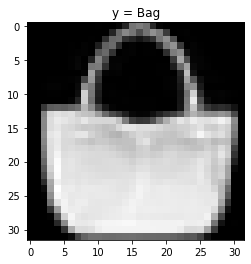

In [11]:
show_data(train_dataset[100])

Build a Convolutional Neural Network Class

In [110]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self):
        super(CNN, self).__init__()
        self.module1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding='same'),
            nn.BatchNorm2d(32),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            ) # 16*16*32
        
        self.module2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same'),
            nn.BatchNorm2d(64),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            ) # 8*8*64
        
        self.module3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding='same'),
            nn.BatchNorm2d(128),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            ) # 4*4*128

        self.flat = nn.Flatten()    
        self.fc1 = nn.Linear(in_features=4*4*128, out_features=4*4*128)
        self.drop = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(in_features=4*4*128, out_features=1024)
        self.fc3 = nn.Linear(in_features=1024, out_features=10)
    
    # Prediction
    def forward(self, x):
        x = self.module1(x)
        x = self.module2(x)
        x = self.module3(x)
        x = self.flat(x)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [111]:
model = CNN()

In [112]:
print(model)

CNN(
  (module1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (module2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (module3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (f

In [113]:
print(f'data in training set: {len(train_dataset)}')
print(f'data in validation set: {len(validation_dataset)}')

data in training set: 60000
data in validation set: 10000


In [114]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=200)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1000)

In [115]:
from sklearn.utils import validation
n_epoch = 30
cost = 0
loss_list = []
count = 0
epoch_loss = []
epoch_acc = []
N_test = len(validation_dataset)
model.to(device)

for epoch in range(n_epoch):
  # correct = 0
  for x, y in train_loader:
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    z = model(x)
    loss = criterion(z,y)
    loss.backward()
    optimizer.step()
    loss_value = loss.cpu()
    loss_list.append(loss_value.item())
  epoch_loss.append(np.mean(loss_list))
  loss_list = []
  correct = 0

  for x_test, y_test in validation_loader:
    x_test, y_test = x_test.to(device), y_test.to(device)
    z = model(x_test)
    _, yhat = torch.max(z.data,1)
    correct += (yhat == y_test).sum().item()
  
  accuracy = correct / N_test
  epoch_acc.append(accuracy)

  print(f'epoch:{epoch+1}, loss={epoch_loss[epoch]}, val_acc={epoch_acc[epoch]}')


epoch:1, loss=0.9989931991696358, val_acc=0.846
epoch:2, loss=0.3900899494191011, val_acc=0.8641
epoch:3, loss=0.3407071711619695, val_acc=0.8635
epoch:4, loss=0.3112790948649247, val_acc=0.8806
epoch:5, loss=0.3072025309999784, val_acc=0.8764
epoch:6, loss=0.28962102244297666, val_acc=0.8895
epoch:7, loss=0.2807961473365625, val_acc=0.8864
epoch:8, loss=0.2635783675312996, val_acc=0.8869
epoch:9, loss=0.26173738126953444, val_acc=0.896
epoch:10, loss=0.2542238935828209, val_acc=0.9049
epoch:11, loss=0.24141527305046717, val_acc=0.8998
epoch:12, loss=0.2281040905912717, val_acc=0.8935
epoch:13, loss=0.22009410430987675, val_acc=0.9011
epoch:14, loss=0.2161267561465502, val_acc=0.9012
epoch:15, loss=0.20947681883970895, val_acc=0.8967
epoch:16, loss=0.20470735378563404, val_acc=0.902
epoch:17, loss=0.20081406821807227, val_acc=0.9032
epoch:18, loss=0.19528231240808963, val_acc=0.9005
epoch:19, loss=0.18861194670200349, val_acc=0.9068
epoch:20, loss=0.18530806797246138, val_acc=0.9089
ep

Text(0.5, 0, 'epoch')

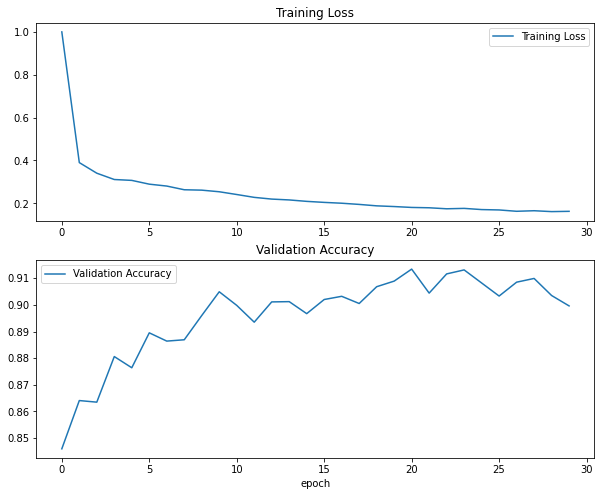

In [117]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(epoch_loss, label='Training Loss')
plt.legend(loc='best')
plt.title('Training Loss')

plt.subplot(2, 1, 2)
plt.plot(epoch_acc, label='Validation Accuracy')
plt.plot()
plt.legend(loc='best')
plt.title('Validation Accuracy')
plt.xlabel('epoch')